In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
ads_data = pd.read_csv("ads_data.csv")
app_review = pd.read_csv("app_review.csv")
channel_subscriptions = pd.read_csv("channel_subscriptions.csv")

## Data Summarization
ads_summary = ads_data.describe()
app_review_summary = app_review.describe()
channel_subscriptions_summary = channel_subscriptions.describe()

## Data Quality Assessment
ads_data_quality = ads_data.isnull().sum()
app_review_quality = app_review.isnull().sum()
channel_subscriptions_quality = channel_subscriptions.isnull().sum()

## Univariate Analysis
# Example: Histogram of app ratings
plt.figure(figsize=(8, 6))
sns.histplot(app_review['rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Bivariate or Multivariate Analysis
# Example: Scatter plot of app ratings vs. app downloads
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='downloads', data=app_review)
plt.title('App Ratings vs. Downloads')
plt.xlabel('Rating')
plt.ylabel('Downloads')
plt.show()

## Data Enrichment
# This step involves feature engineering or incorporating additional datasets, which cannot be automated without specific requirements.

## Data Comparison
# Example: Comparison of average ratings between different types of ads
ads_comparison = ads_data.groupby('ad_type')['rating'].mean()

## Trends Over Time
# Example: Line plot of app downloads over time
plt.figure(figsize=(10, 6))
app_review['date'] = pd.to_datetime(app_review['date'])
sns.lineplot(x='date', y='downloads', data=app_review)
plt.title('App Downloads Over Time')
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.show()

## Correlation between different datasets
# Example: Correlation matrix between app review and ad metrics
merged_data = pd.merge(app_review, ads_data, on='app_id', how='inner')
correlation_matrix = merged_data[['rating', 'downloads', 'ad_spend']].corr()

## Outlier Detection
# Example: Box plot of ad spend
plt.figure(figsize=(8, 6))
sns.boxplot(y='ad_spend', data=ads_data)
plt.title('Distribution of Ad Spend')
plt.ylabel('Ad Spend')
plt.show()

## Visualization
# Produce 10 creative and beautiful plots capturing key insights
# You can create various types of plots based on the analysis conducted above.

# Example: Pairplot of app review data
sns.pairplot(app_review[['rating', 'downloads', 'sentiments']])
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Function to connect to PostgreSQL database
def connect_to_postgres(db_name, db_user, db_password, db_host, db_port):
    engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
    return engine

# Function to load data from PostgreSQL
def load_data_from_postgres(engine, table_name):
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql_query(query, engine)
    return data

# Function to close database connection
def close_connection(engine):
    engine.dispose()

# Database credentials
db_name = 'tickvah_banks_ads'
db_user = 'postgres'
db_password = 'admin'
db_host = 'localhost'
db_port = '5432'

# Connect to PostgreSQL database
engine = connect_to_postgres(db_name, db_user, db_password, db_host, db_port)

# Load datasets from PostgreSQL
ads_data = load_data_from_postgres(engine, 'bank_advertisements')
app_review = load_data_from_postgres(engine, 'playstore_reviews')
channel_subscriptions = load_data_from_postgres(engine, 'telegram_subscriptions')

# Function to perform exploratory data analysis (EDA)
def perform_eda(data, data_name):
    print(f"Exploratory Data Analysis (EDA) for {data_name}:")
    print("Data Summary:")
    print(data.head())
    print("Data Info:")
    print(data.info())
    print("Data Description:")
    print(data.describe())
    print("Data Quality Assessment:")
    print(data.isnull().sum())

    # Perform more EDA tasks here...

# Perform EDA for each dataset
perform_eda(ads_data, 'Bank Advertisements')
perform_eda(app_review, 'App Review')
perform_eda(channel_subscriptions, 'Channel Subscriptions')

# Close database connection
close_connection(engine)


Exploratory Data Analysis (EDA) for Bank Advertisements:
Data Summary:
                  date                          post_link    view  post_hour  \
0  2024-05-14 07:49:21  https://t.me/tikvahethiopia/87636  249796          7   
1  2024-05-10 13:39:46  https://t.me/tikvahethiopia/87532  280083         13   
2  2024-05-07 10:46:34  https://t.me/tikvahethiopia/87496  304194         10   
3  2024-04-30 17:01:34  https://t.me/tikvahethiopia/87344  234557         17   
4  2024-04-26 18:11:43  https://t.me/tikvahethiopia/87236  263870         18   

  bank time_of_day  
0  BOA     Morning  
1  BOA   Afternoon  
2  BOA     Morning  
3  BOA   Afternoon  
4  BOA     Evening  
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         576 non-null    object
 1   post_link    576 non-null    object
 2   view         576 non-null    int64 
 3

In [18]:
import pandas as pd
from sqlalchemy import create_engine

# Function to connect to PostgreSQL database
def connect_to_postgres(db_name, db_user, db_password, db_host, db_port):
    engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
    return engine

# Function to load data from PostgreSQL
def load_data_from_postgres(engine, table_name):
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql_query(query, engine)
    return data

# Function to close database connection
def close_connection(engine):
    engine.dispose()

# Database credentials
db_name = 'tickvah_banks_ads'
db_user = 'postgres'
db_password = 'admin'
db_host = 'localhost'
db_port = '5432'

# Connect to PostgreSQL database
engine = connect_to_postgres(db_name, db_user, db_password, db_host, db_port)

# Load bank advertisements data from Tikvah-Ethiopia channel
bank_ads_data = load_data_from_postgres(engine, 'bank_advertisements')

# Load app reviews and daily install count data from Play Store
app_review_data = load_data_from_postgres(engine, 'playstore_reviews')
daily_install_count_data = load_data_from_postgres(engine, 'daily_install_count')

# Load telegram subscription data for the main bank channel
telegram_subscription_data = load_data_from_postgres(engine, 'telegram_subscriptions')

# Close database connection
close_connection(engine)

# Perform EDA for bank advertisements data
print("EDA for Bank Advertisements Data:")
print(bank_ads_data.head())
print(bank_ads_data.info())
print(bank_ads_data.describe())
print(bank_ads_data.isnull().sum())

# Perform EDA for app reviews and install count data
print("EDA for App Reviews Data:")
print(app_review_data.head())
print(app_review_data.info())
print(app_review_data.describe())
print(app_review_data.isnull().sum())

print("EDA for Daily Install Count Data:")
print(daily_install_count_data.head())
print(daily_install_count_data.info())
print(daily_install_count_data.describe())
print(daily_install_count_data.isnull().sum())

# Perform EDA for telegram subscription data
print("EDA for Telegram Subscription Data:")
print(telegram_subscription_data.head())
print(telegram_subscription_data.info())
print(telegram_subscription_data.describe())
print(telegram_subscription_data.isnull().sum())



EDA for Bank Advertisements Data:
                  date                          post_link    view  post_hour  \
0  2024-05-14 07:49:21  https://t.me/tikvahethiopia/87636  249796          7   
1  2024-05-10 13:39:46  https://t.me/tikvahethiopia/87532  280083         13   
2  2024-05-07 10:46:34  https://t.me/tikvahethiopia/87496  304194         10   
3  2024-04-30 17:01:34  https://t.me/tikvahethiopia/87344  234557         17   
4  2024-04-26 18:11:43  https://t.me/tikvahethiopia/87236  263870         18   

  bank time_of_day  
0  BOA     Morning  
1  BOA   Afternoon  
2  BOA     Morning  
3  BOA   Afternoon  
4  BOA     Evening  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         576 non-null    object
 1   post_link    576 non-null    object
 2   view         576 non-null    int64 
 3   post_hour    576 non-null    int64 
 4   bank

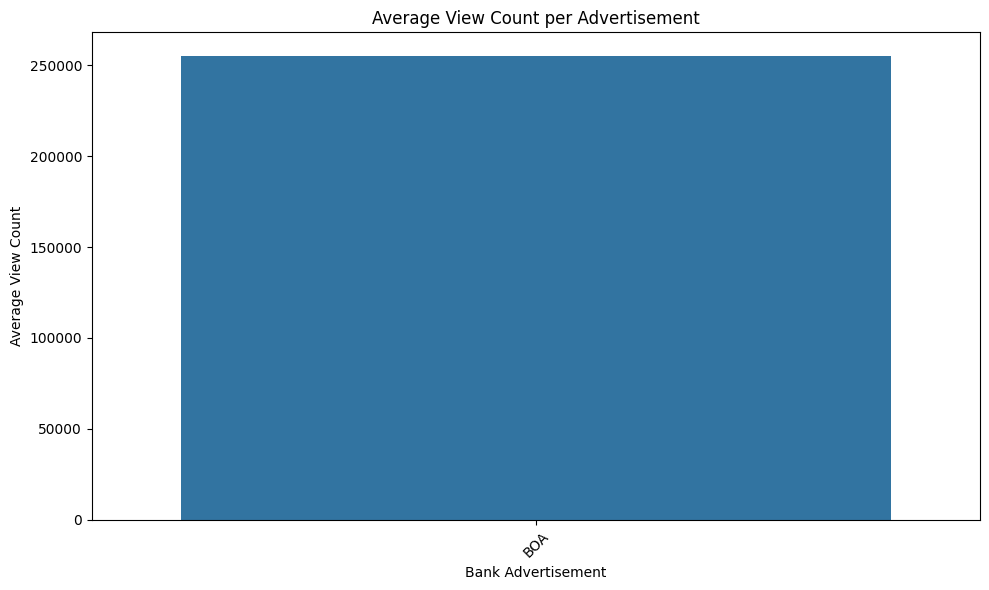

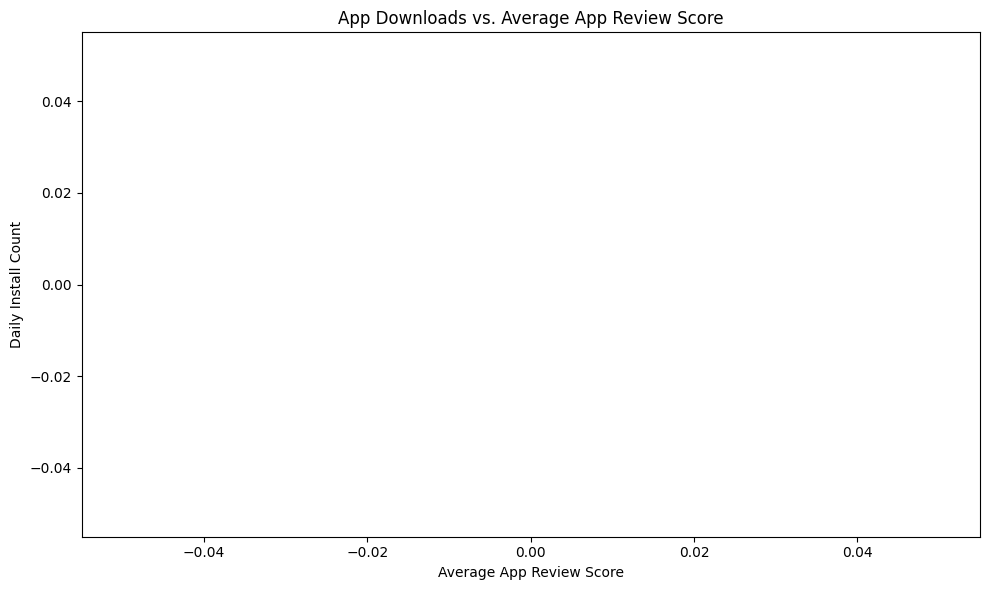

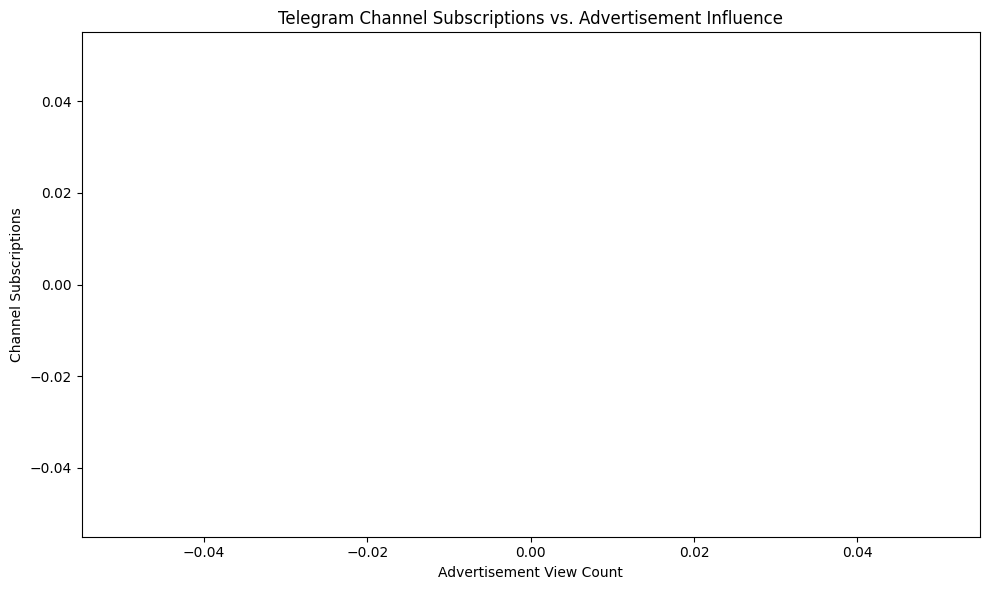

Correlation Matrix:
             view  subscribers
view          NaN          NaN
subscribers   NaN          1.0


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Function to connect to PostgreSQL database
def connect_to_postgres(db_name, db_user, db_password, db_host, db_port):
    engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
    return engine

# Function to load data from PostgreSQL
def load_data_from_postgres(engine, table_name):
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql_query(query, engine)
    return data

# Function to close database connection
def close_connection(engine):
    engine.dispose()

# Database credentials
db_name = 'tickvah_banks_ads'
db_user = 'postgres'
db_password = 'admin'
db_host = 'localhost'
db_port = '5432'





# Connect to PostgreSQL database
engine = connect_to_postgres(db_name, db_user, db_password, db_host, db_port)

# Load datasets from PostgreSQL
bank_ads_data = load_data_from_postgres(engine, 'bank_advertisements')
app_review_data = load_data_from_postgres(engine, 'playstore_reviews')
daily_install_count_data = load_data_from_postgres(engine, 'daily_install_count')
telegram_subscription_data = load_data_from_postgres(engine, 'telegram_subscriptions')

# Close database connection
close_connection(engine)

# Further analysis and visualization for marketing efficiency insights

# 1. Bank Advertisements Performance Analysis
# Group by bank and calculate the average view count per advertisement
bank_ads_data['date'] = pd.to_datetime(bank_ads_data['date'])
bank_ads_performance = bank_ads_data.groupby('bank')['view'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='bank', y='view', data=bank_ads_performance)
plt.title('Average View Count per Advertisement')
plt.xlabel('Bank Advertisement')
plt.ylabel('Average View Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Aggregate app reviews by date
app_review_agg = app_review_data.groupby('at')['score'].mean().reset_index()
app_review_agg.rename(columns={'at': 'date'}, inplace=True)

# Merge aggregated app reviews with daily install count data
app_data = pd.merge(app_review_agg, daily_install_count_data, on='date', how='left')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='install_count', data=app_data)
plt.title('App Downloads vs. Average App Review Score')
plt.xlabel('Average App Review Score')
plt.ylabel('Daily Install Count')
plt.tight_layout()
plt.show()


# 3. Telegram Channel Subscriptions vs. Advertisement Influence
# Merge telegram subscription data with bank advertisements data
telegram_ads_data = pd.merge(telegram_subscription_data, bank_ads_data, on='date', how='left')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view', y='subscribers', data=telegram_ads_data)
plt.title('Telegram Channel Subscriptions vs. Advertisement Influence')
plt.xlabel('Advertisement View Count')
plt.ylabel('Channel Subscriptions')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation_matrix = telegram_ads_data[['view', 'subscribers']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


In [27]:
print("Columns of telegram_ads_data:")
print(telegram_ads_data.columns)


Columns of telegram_ads_data:
Index(['id', 'date', 'subscribers', 'post_link', 'view', 'post_hour', 'bank',
       'time_of_day'],
      dtype='object')


In [31]:
# Count the number of advertisements per bank
num_ads_per_bank = bank_ads_data.groupby('bank').size().reset_index(name='num_ads')

# Calculate correlation between 'num_ads' and 'subscribers'
correlation_num_ads_subscribers = num_ads_per_bank['num_ads'].corr(telegram_subscription_data['subscribers'])

# Calculate correlation between 'num_ads' and 'score'
correlation_num_ads_score = num_ads_per_bank['num_ads'].corr(app_review_agg['score'])

# Calculate correlation between 'num_ads' and 'install_count'
correlation_num_ads_install_count = num_ads_per_bank['num_ads'].corr(daily_install_count_data['install_count'])

# Print correlation values
print(f"Correlation between Number of Advertisements and Channel Subscriptions: {correlation_num_ads_subscribers}")
print(f"Correlation between Number of Advertisements and Average App Review Score: {correlation_num_ads_score}")
print(f"Correlation between Number of Advertisements and Daily Install Count: {correlation_num_ads_install_count}")


Correlation between Number of Advertisements and Channel Subscriptions: nan
Correlation between Number of Advertisements and Average App Review Score: nan
Correlation between Number of Advertisements and Daily Install Count: nan


/home/yadasa/Desktop/marketing-analytics/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/yadasa/Desktop/marketing-analytics/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/yadasa/Desktop/marketing-analytics/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/yadasa/Desktop/marketing-analytics/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/yadasa/Desktop/marketing-analytics/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/yadasa/Desktop/marketing-an

In [32]:
print("Missing values in num_ads_per_bank:")
print(num_ads_per_bank.isnull().sum())

print("Missing values in telegram_subscription_data:")
print(telegram_subscription_data.isnull().sum())

print("Missing values in app_review_agg:")
print(app_review_agg.isnull().sum())

print("Missing values in daily_install_count_data:")
print(daily_install_count_data.isnull().sum())



Missing values in num_ads_per_bank:
bank       0
num_ads    0
dtype: int64
Missing values in telegram_subscription_data:
id             0
date           0
subscribers    0
dtype: int64
Missing values in app_review_agg:
date     0
score    0
dtype: int64
Missing values in daily_install_count_data:
date             0
install_count    0
dtype: int64


In [33]:
print("Unique values in num_ads_per_bank['num_ads']: ", num_ads_per_bank['num_ads'].unique())
print("Unique values in telegram_subscription_data['subscribers']: ", telegram_subscription_data['subscribers'].unique())
print("Unique values in app_review_agg['score']: ", app_review_agg['score'].unique())
print("Unique values in daily_install_count_data['install_count']: ", daily_install_count_data['install_count'].unique())


Unique values in num_ads_per_bank['num_ads']:  [576]
Unique values in telegram_subscription_data['subscribers']:  [161670 161667 161666 161665]
Unique values in app_review_agg['score']:  [1. 2. 5. 4. 3.]
Unique values in daily_install_count_data['install_count']:  [  4 311  20  22  95   7   2  92   1   3  10   0]


In [44]:
# Calculate correlation matrix
correlation_matrix = pd.concat([num_ads_per_bank['num_ads'], telegram_subscription_data['subscribers'], 
                                 app_review_agg['score'], daily_install_count_data['install_count']], axis=1).corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               num_ads  subscribers     score  install_count
num_ads            NaN          NaN       NaN            NaN
subscribers        NaN     1.000000 -0.343255      -0.081508
score              NaN    -0.343255  1.000000      -0.108332
install_count      NaN    -0.081508 -0.108332       1.000000


In [40]:
print(num_ads_per_bank.columns)


Index(['bank', 'num_ads'], dtype='object')


In [11]:
ads_data.head()
ads_data.columns

Index(['date', 'post_link', 'view', 'post_hour', 'bank', 'time_of_day'], dtype='object')

In [10]:
app_review.head()
app_review.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt',
       'appVersion'],
      dtype='object')

In [8]:
channel_subscriptions.head()
channel_subscriptions.columns

Index(['id', 'date', 'subscribers'], dtype='object')

                view   post_hour
count     576.000000  576.000000
mean   255218.586806   12.027778
std     50597.203829    3.849236
min     60765.000000    5.000000
25%    232667.750000    9.000000
50%    257094.000000   12.000000
75%    276236.250000   15.000000
max    554119.000000   20.000000
            score                             at
count  398.000000                            398
mean     2.846734  2024-04-22 16:48:46.886934784
min      1.000000            2024-02-26 14:35:38
25%      1.000000            2024-04-17 00:51:26
50%      2.000000            2024-04-29 15:47:34
75%      5.000000  2024-05-04 04:04:54.249999872
max      5.000000            2024-05-21 10:17:07
std      1.834219                            NaN
date           0
post_link      0
view           0
post_hour      0
bank           0
time_of_day    0
dtype: int64
reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
reviewC

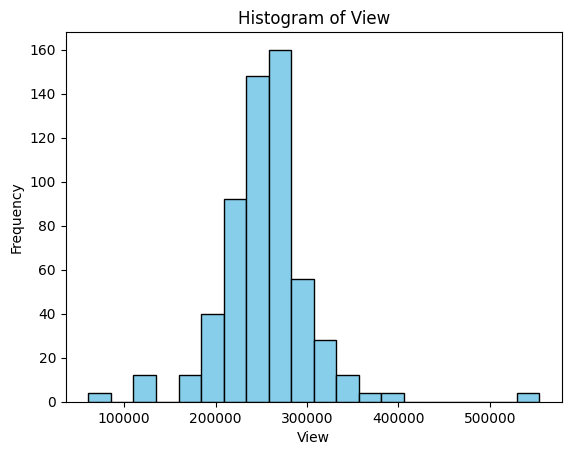

ValueError: Could not interpret value `views` for `x`. An entry with this name does not appear in `data`.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
conn = connect_to_postgres('tickvah_banks_ads', 'postgres', 'admin', 'localhost', '5432')
telegram_data = load_data_from_postgres(conn, 'bank_advertisements')
playstore_review = load_data_from_postgres(conn, 'playstore_reviews')

# Exploratory Data Analysis (EDA)
# Data Summarization
print(telegram_data.describe())
print(playstore_review.describe())

# Data Quality Assessment
print(telegram_data.isnull().sum())
print(playstore_review.isnull().sum())

# Univariate Analysis
plt.hist(telegram_data['view'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('View')
plt.ylabel('Frequency')
plt.title('Histogram of View')
plt.show()

# Bivariate Analysis
# Ensure column names are correct
sns.scatterplot(x='views', y='comments', data=telegram_data)
plt.xlabel('Views')
plt.ylabel('Comments')
plt.title('Scatter Plot of Views vs Comments')
plt.show()

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='downloads', data=playstore_review)
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.title('App Downloads Over Time')
plt.show()

# Close connection
conn.close()
